<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/Tutorials/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch 
from torchvision import datasets,transforms
from torchvision.util import train_l

In [0]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data',transform=transform,download=True,train=True)
test_data = datasets.MNIST(root='data',transform=transform,download=True,train=False)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=32)

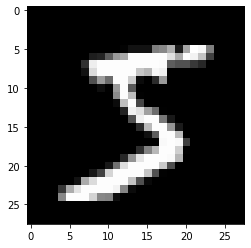

In [11]:
import matplotlib.pyplot as plt


train_iter = iter(train_loader)
images,_ = train_iter.next()

img = np.squeeze(np.array(images[0]))

plt.imshow(img,cmap='gray')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class LinearModel(nn.Module):
    def __init__(self,input_size,hidden_size):
        super(LinearModel,self).__init__()
        self.conv1 = nn.Conv2D
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fcb = nn.Linear(hidden_size,input_size)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fcb(x)) #sigmoid

        return x

model = LinearModel(28*28,32)
model = model.to(torch.device('cuda'))

In [0]:
critertion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [45]:
epochs = 20

for epoch in range(epochs):
    train_loss = 0
    for data in train_loader:
        images,_ = data
        images = images.to(torch.device('cuda'))
        images = images.view(-1,28*28)
        images.requires_grad_()

        optimizer.zero_grad()
        output = model(images)
        loss = critertion(output,images)

        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    print('Epoch: ',epoch,' Loss:',train_loss)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch:  0  Loss: 72.61987763084471
Epoch:  1  Loss: 36.4939473811537
Epoch:  2  Loss: 29.123026811517775
Epoch:  3  Loss: 27.136877186596394
Epoch:  4  Loss: 26.54905848763883
Epoch:  5  Loss: 26.289081594906747
Epoch:  6  Loss: 26.12061751447618
Epoch:  7  Loss: 26.00212847162038
Epoch:  8  Loss: 25.919990576803684
Epoch:  9  Loss: 25.850337903946638
Epoch:  10  Loss: 25.779733549803495
Epoch:  11  Loss: 25.69759841170162
Epoch:  12  Loss: 25.641131547279656
Epoch:  13  Loss: 25.596635072492063
Epoch:  14  Loss: 25.557783188298345
Epoch:  15  Loss: 25.52080794516951
Epoch:  16  Loss: 25.48614634014666
Epoch:  17  Loss: 25.453725470229983
Epoch:  18  Loss: 25.422761792317033
Epoch:  19  Loss: 25.392737665213645


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


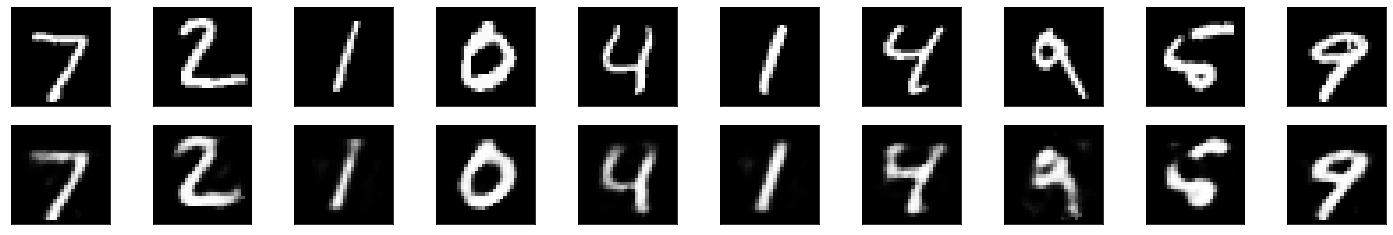

In [46]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
images_flatten = images_flatten.to(torch.device('cuda'))
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(32, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().cpu().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)